# Analyzing Client Behavior and Determining the Prepaid Plan that's more Profitable


The company (telecom operator called Megaline) offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

We have to carry out a preliminary analysis of the plans based on a relatively small client selection. We currently have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent. We will have to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## General Information

We start our project by loading the required libraries to complete future tasks

In [1]:
import numpy as np 
#needed for mathermatical operations 

import pandas as pd 
#needed for our dataframe manipulation

from scipy import stats as st 
#needed for our statistics calculations

import matplotlib.pyplot as plt 
#needed for our data visualization and graph plotting

import warnings
warnings.filterwarnings("ignore")

from functools import reduce

## Loading data

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
#loading the data from the megaline_calls.csv file and converting it to a dataframe called calls

internet = pd.read_csv('/datasets/megaline_internet.csv')
#loading the data from the megaline_internet.csv file and converting it to a dataframe called internet

messages = pd.read_csv('/datasets/megaline_messages.csv')
#loading the data from the megaline_messages.csv file and converting it to a dataframe called messages

plans = pd.read_csv('/datasets/megaline_plans.csv')
#loading the data from the megaline_plans.csv file and converting it to a dataframe called plans

users = pd.read_csv('/datasets/megaline_users.csv')
#loading the data from the megaline_users.csv file and converting it to a dataframe called users

## Preparing Data

The data for this project is split into several tables. We will explore each one to get an initial understanding of the data and will also do necessary corrections to each table if necessary.

### Calls Data

In [3]:
calls.info() #getting a general sense of the calls dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls.head() #printing the first 5 rows of the calls dataset

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Internet Data

In [5]:
internet.info() #getting a general sense of the internet dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
internet.head() #printing the first 5 rows of the internet dataset

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Messages Data

In [7]:
messages.info() #getting a general sense of the messages dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
messages.head() #printing the first 5 rows of the messages dataset

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Plans Data

In [9]:
plans.info() #getting a general sense of the plans dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [10]:
plans.head() #printing the first 5 rows of the plans dataset

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Users Data

In [11]:
users.info() #getting a general sense of the users dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
users.head() #printing the first 5 rows of the users dataset

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Conclusion

Overall we don't see any major issues with our data. We just have to convert all date columns to the coresponding date data type. Additionally, we need to create a month column to each data that has a date column, in order to use it to future calculations. 

Lastly, we only see missing values in  one column the churn_date column of the users dataframe. However, this column represents the date that users stopped using the service which means that the missing values refer to all the customers that are still and thus we will leave it as it is. 

## Data Preprocessing

### Correcting the 'Calls' Data

First we will convert the duration column into integers and also we will round up since the company automatically rounds all calls to minutes. Then we will make sure to change the date column to the correct data type.

In [13]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
#rounding up with the np.ceil method and also converting data into integers

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
#converting the data type of the 'call_date' column to the correct data type

calls['call_month'] = calls['call_date'].astype('datetime64[M]')
#adding an additional column that states the month of the calls

calls.info()
#making sure the above corrections have been succesfully made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  int64         
 4   call_month  137735 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 5.3+ MB


### Correcting the 'Internet' Data

Here we will need to convert the megabytes to gigabytes and also convert the date column to the correct data type.

In [14]:
internet['mb_used'] = internet['mb_used']/1024
#converting megabytes to gigabytes by dividing by 1024 since 1024mb = 1gb 

internet = internet.rename(columns={'mb_used':'gb_used'})
#changing the columnn name from 'mb_used' to 'gb_used'

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
#converting the data type of the 'session_date' column to the correct data type

internet['session_month'] = internet['session_date'].astype('datetime64[M]')
#adding an additional column that states the month of the web session date

internet.info()
internet.head()
#making sure the above corrections have been succesfully made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   gb_used        104825 non-null  float64       
 4   session_month  104825 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 4.0+ MB


,id,user_id,session_date,gb_used,session_month
0,1000_13,1000,2018-12-29,0.087754,2018-12-01
1,1000_204,1000,2018-12-31,0.000000,2018-12-01
2,1000_379,1000,2018-12-28,0.644922,2018-12-01
3,1000_413,1000,2018-12-26,0.264639,2018-12-01
4,1000_442,1000,2018-12-27,0.859590,2018-12-01


### Correcting the 'Messages' Data

In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
#converting the data type of the 'message_date' column to the correct data type

messages['message_month'] = messages['message_date'].astype('datetime64[M]')
#adding an additional column that states the month of the message date

messages.info()
messages.head()
#making sure the above corrections have been succesfully made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  datetime64[ns]
 3   message_month  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.3+ MB


,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,2018-12-01
1,1000_160,1000,2018-12-31,2018-12-01
2,1000_223,1000,2018-12-31,2018-12-01
3,1000_251,1000,2018-12-27,2018-12-01
4,1000_255,1000,2018-12-26,2018-12-01


### Correcting the 'Plans' Data

In [16]:
plans['mb_per_month_included'] = plans['mb_per_month_included']/1024
#converting megabytes to gigabytes by dividing by 1024 since 1024mb = 1gb 

plans = plans.rename(columns={'mb_per_month_included':'gb_per_month_included'})
#changing the columnn name from 'mb_used' to 'gb_used'

plans.info()
plans.head()
#making sure the above corrections have been succesfully made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


### Correcting the 'Users' Data

In [17]:
users['plan'] = users['plan'].astype('category')
#converting the data type of the 'plan' column to the correct data type

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
#converting the data type of the 'reg_date' column to the correct data type

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
#converting the data type of the 'churn_date' column to the correct data type

users.info()
users.head()
#making sure the above corrections have been succesfully made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.1+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


## Collecting All the Data Needed

Since all of our data is in different tables/variables we will create a new one from scratch that will include the data that we need to work with. We will name the new table/variable users_data.

In [18]:
users_data = users[['user_id', 'first_name', 'last_name', 'city', 'plan']]
#collecting all the data needed from the users table to our new table 'users_data'

users_data.head()
#making sure the above correction has been succesfully made

,user_id,first_name,last_name,city,plan
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,Carlee,Hoffman,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,Reynaldo,Jenkins,"Tulsa, OK MSA",surf
4,1004,Leonila,Thompson,"Seattle-Tacoma-Bellevue, WA MSA",surf


It is important to remember that every user has its own identifier (user_id) and thankfully this is present in all of our tables, which will make things easy for future calculations. 

### Number of Calls Made per Month &
### Number of Minutes Made per Month

Here we will use the aggregating strategy together with groupby to find the calls and minutes per user per month.

In [19]:
calls_agg = calls.groupby(['user_id', 'call_month'],as_index=False).agg({'duration' : 'sum', 'id': 'count'})
#here we are aggregating our data based on user_id and call_month, we sum duration and count the number of calls

calls_agg = calls_agg.rename(columns = {'duration': 'minutes', 'call_month' : "months"}) 
#renaming duration to minutes and 'call_month' to 'months'

calls_agg = calls_agg.rename(columns = {'id': 'calls'}) 
#renaming id to calls

users_data = pd.merge(calls_agg, users_data, on ='user_id')
#merging and overwriting the 'users_data' table

users_data['minutes'] = users_data['minutes'].fillna(0)
#filling all missing values with 0

users_data.info()
users_data.head()
#making sure the above corrections have been succesfully made

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2258 non-null   int64         
 1   months      2258 non-null   datetime64[ns]
 2   minutes     2258 non-null   int64         
 3   calls       2258 non-null   int64         
 4   first_name  2258 non-null   object        
 5   last_name   2258 non-null   object        
 6   city        2258 non-null   object        
 7   plan        2258 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 143.5+ KB


,user_id,months,minutes,calls,first_name,last_name,city,plan
0,1000,2018-12-01,124,16,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,2018-08-01,182,27,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,2018-09-01,315,49,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,2018-10-01,393,65,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,2018-11-01,426,64,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf


### Number of Text Messages Sent per Month

Here we will use the aggregating strategy together with groupby to find the number of texts per user per month.

In [21]:
texts_agg = messages.groupby(['user_id', 'message_month'],as_index=False).agg({'id': 'count'})
#here we are aggregating our data based on user_id and message_month, we count the number of texts

texts_agg = texts_agg.rename(columns = {'id': 'messages', 'message_month' : "months"}) 
#renaming 'id' to 'messages' and 'message_month' to 'months'
 
users_data = pd.merge(texts_agg, users_data, on =['user_id', 'months']) 
#merging and overwriting the 'users_data' table

users_data.info()
users_data.head()
#making sure the above corrections have been succesfully made

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     1773 non-null   int64         
 1   months      1773 non-null   datetime64[ns]
 2   messages    1773 non-null   int64         
 3   minutes     1773 non-null   int64         
 4   calls       1773 non-null   int64         
 5   first_name  1773 non-null   object        
 6   last_name   1773 non-null   object        
 7   city        1773 non-null   object        
 8   plan        1773 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(4), object(3)
memory usage: 126.5+ KB


,user_id,months,messages,minutes,calls,first_name,last_name,city,plan
0,1000,2018-12-01,11,124,16,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,2018-08-01,30,182,27,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,2018-09-01,44,315,49,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,2018-10-01,53,393,65,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,2018-11-01,36,426,64,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf


### Internet Data Used per Month

Here we will follow the same strategy as above, only difference is that we will be aggregating specifically for the internet data.

In [22]:
internet_agg = internet.groupby(['user_id', 'session_month'],as_index=False).agg({'gb_used': 'count'})
#here we are aggregating our data based on user_id and message_month, we sum the number of gb_used

internet_agg = internet_agg.rename(columns = {'gb_used': 'internet_used', 'session_month':'months'}) 
#renaming 'gb_used' to 'internet_used' and 'session_month' to 'months'

users_data = pd.merge(internet_agg, users_data, on =['user_id', 'months'])
#merging and overwriting the 'users_data' table

users_data['internet_used'] = users_data['internet_used'].fillna(0)
#filling all missing values with 0

users_data.info()
users_data.head()
#making sure the above corrections have been succesfully made

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1758
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        1759 non-null   int64         
 1   months         1759 non-null   datetime64[ns]
 2   internet_used  1759 non-null   int64         
 3   messages       1759 non-null   int64         
 4   minutes        1759 non-null   int64         
 5   calls          1759 non-null   int64         
 6   first_name     1759 non-null   object        
 7   last_name      1759 non-null   object        
 8   city           1759 non-null   object        
 9   plan           1759 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(5), object(3)
memory usage: 139.3+ KB


,user_id,months,internet_used,messages,minutes,calls,first_name,last_name,city,plan
0,1000,2018-12-01,5,11,124,16,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,2018-08-01,25,30,182,27,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,2018-09-01,53,44,315,49,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,2018-10-01,56,53,393,65,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,2018-11-01,51,36,426,64,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf


### Monthly Revenue per User

The company offers two packages, one called Surf and another one calle Ultimate. 

The surf plan comes at $20 per month and it includes 500 monthly minutes, 50 texts and 15 data GB. If any of these exceeds then the following will apply: any extra minute will cost 3 cents, any extra text will also cost 3 cents and any additional gigabyte will cost 10 dollars.

The ultimate plan comes at $70 per month and it includes 3000 monthly minutes, 1000 texts, and 30 data GB. If any of these exceeds then the following will apply: any extra minute will cost 1 cent, any extra text will also cost 1 cent and any additional gigabyte will cost 7 dollars.

Based on the above information we will calculate the monthly revenue that the company makes per customer.

In [24]:
def monthly_revenue (row):
#creating a function called 'monthly_revenue'
    
    minutes_different = 0 #creating a variable called minutes_different
    messages_different = 0 #creating a variable called messages_different
    gb_different = 0 #creating a variable called gb_different
        
    plan = row['plan'] #creating a variable that takes column 'plan' for the row in the function                                                                                    
    
    if plan == "surf": #when plan is surf
        
        if row['minutes'] > 500: #if user exceeds 500 mins
            minutes_different = row['minutes'] - 500 #subtracting 500 mins from the total
        
        if row['messages'] > 50: #if user exceeds 50 texts
            messages_different = row['messages'] - 50 #subtracting 50 text from the total
            
        if row['internet_used'] > 15: #if user exceeds 15 gb
            gb_different = row['internet_used'] - 15 #subtracting 15 gb from the total
            
        profit = (20 + minutes_different * 0.03 + messages_different * 0.03 + gb_different * 10)
        #we are calculating the total profit for users that have the surf plan, we do all needed calculations
        #for all the categories that have been exceeded and we also add the flat montly package fee which is $20
    
    if plan == "ultimate":
                                             
        if row['minutes'] > 3000: #if user exceeds 3000 mins
            messages_different = row['minutes'] - 3000 #subtracting 3000 mins from the total
        
        if row['messages'] > 1000: #if user exceeds 1000 texts
            minutes_different = row['messages'] - 1000 #subtracting 1000 mins from the total

        if row['internet_used'] > 30: #if user exceeds 30 gb
            gb_different = row['internet_used'] - 30 #subtracting 30 gb from the total
                        
        profit = (70 + minutes_different * 0.01 + messages_different * 0.01 + gb_different * 7)
        #we are calculating the total profit for users that have the ultimate plan, we do all needed calculations
        #for all the categories that have been exceeded and we also add the flat montly package fee which is $70
    
    return profit #returning the profit

users_data['monthly_revenue'] = users_data.apply(monthly_revenue, axis=1)
#applying the 'monthly_revenue' function to our 'users_data' table and we save it to our 
#table called 'users_data' and to the new column'monthly_revenue'

users_data.info()
users_data.head()
#making sure the above corrections have been succesfully made

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1758
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          1759 non-null   int64         
 1   months           1759 non-null   datetime64[ns]
 2   internet_used    1759 non-null   int64         
 3   messages         1759 non-null   int64         
 4   minutes          1759 non-null   int64         
 5   calls            1759 non-null   int64         
 6   first_name       1759 non-null   object        
 7   last_name        1759 non-null   object        
 8   city             1759 non-null   object        
 9   plan             1759 non-null   category      
 10  monthly_revenue  1759 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 153.0+ KB


,user_id,months,internet_used,messages,minutes,calls,first_name,last_name,city,plan,monthly_revenue
0,1000,2018-12-01,5,11,124,16,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,2018-08-01,25,30,182,27,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,120.00
2,1001,2018-09-01,53,44,315,49,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,400.00
3,1001,2018-10-01,56,53,393,65,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,430.09
4,1001,2018-11-01,51,36,426,64,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,380.00


In [25]:
users_data['monthly_revenue'].isna().sum()
#making sure that we have no missing values

0

### Comparing Regions

Later in the project we will have to look at how the states NY and NJ compare to the rest of the regions so let's add the region column in advance.

In [26]:
users_data['city'].unique()
#printing all unique cities that we have in our table

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Pittsburgh, PA MSA', 'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Denver-Aurora-Lakewood

In [27]:
def region (city):
#creating a function called 'region'

    removing_commas = city.split(",") 
    #removing commas where applicable
    
    for entry in removing_commas: 
    #for every entry we create a for loop

        if ("NY-NJ" in entry)|(entry=="NY")|(entry=="NJ"): 
        #if an entry has either 'NY-NJ' or 'NY' or 'NJ'
        
            return 'ny-nj'
            #returning 'ny-nj'
        
users_data['region'] = users_data['city'].apply(region)
#applying the above function the 'city' column of 'users_data' and saving it to a new column called 'region'

users_data['region'] = users_data['region'].fillna('other')
#any entry that's neither NY or NJ will be named as 'other'

users_data['region'] = users_data['region'].astype('category')
#changing the data type for the column 'region' to category type

users_data['region'].value_counts()
#counting the values for all unique entries

users_data.info()
users_data.head()
#making sure the above corrections have been succesfully made

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1758
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          1759 non-null   int64         
 1   months           1759 non-null   datetime64[ns]
 2   internet_used    1759 non-null   int64         
 3   messages         1759 non-null   int64         
 4   minutes          1759 non-null   int64         
 5   calls            1759 non-null   int64         
 6   first_name       1759 non-null   object        
 7   last_name        1759 non-null   object        
 8   city             1759 non-null   object        
 9   plan             1759 non-null   category      
 10  monthly_revenue  1759 non-null   float64       
 11  region           1759 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 154.8+ KB


,user_id,months,internet_used,messages,minutes,calls,first_name,last_name,city,plan,monthly_revenue,region
0,1000,2018-12-01,5,11,124,16,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00,other
1,1001,2018-08-01,25,30,182,27,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,120.00,other
2,1001,2018-09-01,53,44,315,49,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,400.00,other
3,1001,2018-10-01,56,53,393,65,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,430.09,other
4,1001,2018-11-01,51,36,426,64,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,380.00,other


### Conclusion

We have done all the necessary corrections to the data and we now have all the required data in one place, more specifically at our users_data table.

## Analysis

We will start analyzing minutes, texts and internet data of the users in each plan. Let's start our analysis with the surf plan.

### Surf Data

In [28]:
surf_plan_data = users_data[users_data['plan'] == 'surf']
#saving all the surf data to a new table/variable called 'surf_plan_data'

surf_plan_data.info()
#printing the general infomation about the new table; 'surf_plan_data'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 1 to 1757
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          1180 non-null   int64         
 1   months           1180 non-null   datetime64[ns]
 2   internet_used    1180 non-null   int64         
 3   messages         1180 non-null   int64         
 4   minutes          1180 non-null   int64         
 5   calls            1180 non-null   int64         
 6   first_name       1180 non-null   object        
 7   last_name        1180 non-null   object        
 8   city             1180 non-null   object        
 9   plan             1180 non-null   category      
 10  monthly_revenue  1180 non-null   float64       
 11  region           1180 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 104.0+ KB


#### Minutes per Month Analysis - Surf

In [29]:
np.var(surf_plan_data['minutes']) #finding the variance

55274.530073972994

In [30]:
surf_plan_data['minutes'].describe() #numerical description

count    1180.000000
mean      445.775424
std       235.205044
min         2.000000
25%       288.000000
50%       439.000000
75%       587.250000
max      1510.000000
Name: minutes, dtype: float64

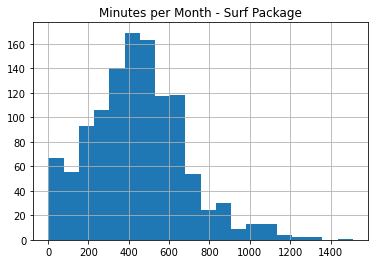

In [31]:
surf_plan_data['minutes'].hist(bins=20)
#creating a histogram from 'minutes_per_month' column with 20 bins

plt.title('Minutes per Month - Surf Package')
#placing a title to our histogram

plt.show() 
#showing the histogram

We can identify that most users are in between 300 - 600 minutes per month with the main peak to be near 300. Lastly, we can determine that the histogram will have a right skew since the mean is greater than the mean.

#### Messages Sent per Month Analysis - Surf

In [32]:
np.var(surf_plan_data['messages']) #finding the variance

1043.3329474288998

In [33]:
surf_plan_data['messages'].describe() #numerical description

count    1180.000000
mean       39.489831
std        32.314360
min         1.000000
25%        16.000000
50%        32.000000
75%        53.000000
max       266.000000
Name: messages, dtype: float64

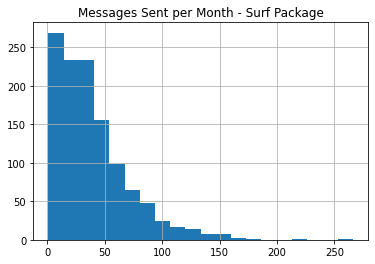

In [34]:
surf_plan_data['messages'].hist(bins=20)
#creating a histogram from 'messages_per_month' column with 20 bins

plt.title('Messages Sent per Month - Surf Package')
#placing a title to our histogram

plt.show() 
#showing the histogram

We can identify that most customers send 0-10 messages per month. This can be potentially explained due to the fact that all the social media nowadays have made regular message not that common. The mean is slightly larger than the median so we should expect to have a right skew. 

#### Data Volume per Month Analysis - Surf

In [35]:
np.var(surf_plan_data['internet_used']) #finding the variance

388.0865347601264

In [36]:
surf_plan_data['internet_used'].describe() #numerical description

count    1180.000000
mean       45.666949
std        19.708265
min         1.000000
25%        35.000000
50%        48.000000
75%        58.000000
max       138.000000
Name: internet_used, dtype: float64

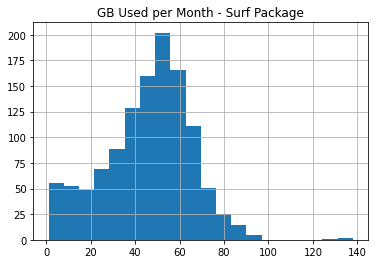

In [37]:
surf_plan_data['internet_used'].hist(bins=20)
#creating a histogram from 'gb_used_per_month' column with 20 bins

plt.title('GB Used per Month - Surf Package')
#placing a title to our histogram

plt.show() 
#showing the histogram

Here we can tell that the Surf clients use data quite a lot. More specifically we see a peak between 40-50GB of data per month. Lastly, we can observe an outlier approximately at 80GB. There's no major difference between the median and the mean which makes us belive that the graph would be presented almost as a normal distribution.

### Ultimate Data


In [38]:
ultimate_plan_data = users_data[users_data['plan'] == 'ultimate']
#saving all the ultimate data to a new table/variable called 'ultimate_plan_data'

ultimate_plan_data.info()
#printing the general infomation about the new table; 'ultimate_plan_data'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 1758
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          579 non-null    int64         
 1   months           579 non-null    datetime64[ns]
 2   internet_used    579 non-null    int64         
 3   messages         579 non-null    int64         
 4   minutes          579 non-null    int64         
 5   calls            579 non-null    int64         
 6   first_name       579 non-null    object        
 7   last_name        579 non-null    object        
 8   city             579 non-null    object        
 9   plan             579 non-null    category      
 10  monthly_revenue  579 non-null    float64       
 11  region           579 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 51.1+ KB


#### Minutes per Month Analysis - Ultimate


In [39]:
np.var(ultimate_plan_data['minutes']) #finding the variance

62180.81978039679

In [40]:
ultimate_plan_data['minutes'].describe() #numerical description

count     579.000000
mean      442.512953
std       249.576439
min         0.000000
25%       262.500000
50%       424.000000
75%       582.500000
max      1369.000000
Name: minutes, dtype: float64

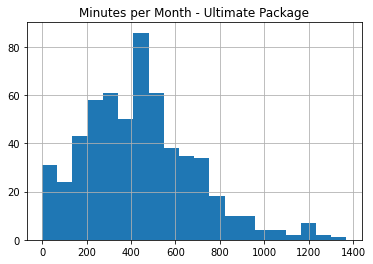

In [41]:
ultimate_plan_data['minutes'].hist(bins=20)
#creating a histogram from 'minutes_per_month' column with 20 bins

plt.title('Minutes per Month - Ultimate Package')
#placing a title to our histogram

plt.show() 
#showing the histogram

We can identify that most users use around 200-500 with a big peak in close to 500 minutes per month. Additionally, we can notice that the median is greater than the mean and thus the graph should skew to the left.

#### Messages per Month Analysis - Ultimate

In [42]:
np.var(ultimate_plan_data['messages']) #finding the variance

1082.5209446338606

In [43]:
ultimate_plan_data['messages'].describe() #numerical description

count    579.000000
mean      46.455959
std       32.930135
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: messages, dtype: float64

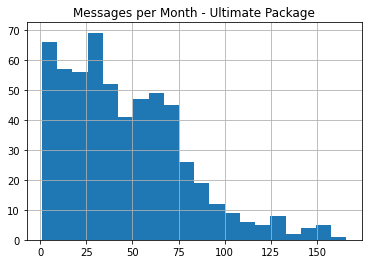

In [44]:
ultimate_plan_data['messages'].hist(bins=20)
#creating a histogram from 'messages_per_month' column with 20 bins

plt.title('Messages per Month - Ultimate Package')
#placing a title to our histogram

plt.show() 
#showing the histogram

On the histogram above we can see that most users sent 0-10 messages per month and since the mean is greater than the median we can identify a right skew.

#### Data Volume per Month Analysis - Ultimate

In [45]:
np.var(ultimate_plan_data['internet_used']) #finding the variance

304.1900065922725

In [46]:
ultimate_plan_data['internet_used'].describe() #numerical description

count    579.000000
mean      46.215889
std       17.456125
min        1.000000
25%       36.000000
50%       49.000000
75%       57.000000
max      111.000000
Name: internet_used, dtype: float64

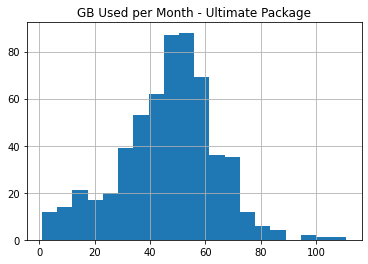

In [47]:
ultimate_plan_data['internet_used'].hist(bins=20)
#creating a histogram from 'gb_used_per_month' column with 20 bins

plt.title('GB Used per Month - Ultimate Package')
#placing a title to our histogram

plt.show() 
#showing the histogram

We can observe that most users consume around 35-55GB per month. The mean and the median are very close so we should expect the graph to be present as normal distribution. 

## Hypothesis Testing

### Hypothesis Testing 1 - The average revenue from users of Ultimate and Surf calling plans differs.

Let’s start by specifying our null hypothesis and alternate hypothesis:

H0: The average revenue from users of Ultimate and Surf calling plans are equal. 

HA: The average revenue from users of Ultimate and Surf calling plans are not equal. 

We will use the st.ttest_ind() method which is meant for t-test (equality of means or average between two statistical populations). The function will return a p-value which will compare to a value known as the statistical significance (named alpha and will set it to be equal to 5%). If the p-value is less than the alpha then that means that the averages (means) are not likely the same and thus we will accept the alternate hypothesis. However, if the p-value turns out to be greater than our alpha that would mean the averages (means) are likely to be the same and thus we will confidently accept the null hypothesis.   

In [48]:
np.var(ultimate_plan_data['monthly_revenue']) #finding variance for the surf package data

9600.820359084957

In [49]:
np.var(surf_plan_data['monthly_revenue']) #finding variance for the ultimate package data

33775.474040811474

At first glance we can notice that the variances are quite far from each other but moving forward we will conduct our test. 

In [50]:
alpha = 0.05 #creating our statistical significance at 5% 

results = st.ttest_ind(ultimate_plan_data['monthly_revenue'], surf_plan_data['monthly_revenue'], equal_var=False)
#performing the t-test with the help of the scipy library

print ('p-value:', results.pvalue) #printing the p-value

if results.pvalue < alpha: #if p-value is less than alpha meaning the averages are not the same

    print ("We reject the null Hypothesis") #we won't reject the hypothesis

else:
    print ("We can't reject the null hypothesis") #we will reject the hypothesis

p-value: 3.242786230250485e-84
We reject the null Hypothesis


The p-value is much less than alpha which is why we reject the null hypothesis.

### Hypothesis Testing 2 - The average revenue from users in NY-NJ area is different from that of the users from other regions.


Let’s start by specifying our null hypothesis and alternate hypothesis:

H0: The average revenue from users in NY-NJ area is the same from that of the users from other regions

HA: The average revenue from users in NY-NJ area is different from that of the users from other regions.

The reason that we previously added the region column to our 'users_data' table is exactly because we would have to eventually face the Hypothesis Testing 2. More specifically, we will need to create a separate table with just the 'ny-nj' data and another with the 'other' data.

In [51]:
ny_nj_data = users_data[users_data['region'] == "ny-nj"] #collecting all the region data that are 'ny-nj'

ny_nj_data.info() #confirming

other_data = users_data[users_data['region'] == "other"] #collecting all the region data that are 'other'

other_data.info() #confirming

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 37 to 1752
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          279 non-null    int64         
 1   months           279 non-null    datetime64[ns]
 2   internet_used    279 non-null    int64         
 3   messages         279 non-null    int64         
 4   minutes          279 non-null    int64         
 5   calls            279 non-null    int64         
 6   first_name       279 non-null    object        
 7   last_name        279 non-null    object        
 8   city             279 non-null    object        
 9   plan             279 non-null    category      
 10  monthly_revenue  279 non-null    float64       
 11  region           279 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 24.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 e

In [52]:
np.var(ny_nj_data['monthly_revenue']) #finding variance for the 'ny-nj' data

25569.681629030976

In [53]:
np.var(other_data['monthly_revenue']) #finding variance for the 'other' regions data

30849.126203483152

Looks like the variances are far apart let's run the test.

In [54]:
alpha = 0.05 #creating our statistical significance at 5% 

results = st.ttest_ind(ny_nj_data['monthly_revenue'], other_data['monthly_revenue'], equal_var=False)
#performing the t-test with the help of the scipy library

print ('p-value:', results.pvalue) #printing the p-value

if results.pvalue < alpha: #if p-value is less than alpha meaning the averages are not the same

    print ("We reject the null Hypothesis") #we won't reject the hypothesis

else:
    print ("We can't reject the null hypothesis") #we will reject the hypothesis

p-value: 0.18499667887775242
We can't reject the null hypothesis


It turns out that we don't have enough evidence to reject the null hypothesis. So, "The average revenue from users in NY-NJ area is the same from that of the users from other regions.

## Overall Conclusion

To quicly recap all the step we followed for this project. We started by loading all the data from all the different files that we had been given (calls, internet, messages, plans and users data files). Later, we begun our data preprocessing for every single dataset. In this step we cleaned the data by correcting the data types and adding additional columns when needed. The reason that we created additional columns at this stage is because would come handy in our analysis. Once the data preprocessing stage was succesfully completed we created a new table, which we included all the data that we would find useful so that are now together and organized. 

Later, we created functions to calculate the number of calls, minutes, messages, internet GB used per month per user. We also cleaned and added the NY & NJ data in a diffrenet table and named all other regions as 'other'. Once we had all the above information completed we were able to start our analysis which we supported by getting crucial numerical descriptions and by creating visualization with the help of .hist() method.

After a deep analysis on the users of each plan we can tell that they do have similar behavior. In the last part of the project we performed 2 t-tests and in the first one we rejected the H0 because the p-value was less than the alpha and in our second Hypothesis we had not enough evidence to reject the H0. 